# Single Cell Sequencing: extra plottings for exploration

In [1]:
### Reading Sharma, Ginty dataset
import numpy as np
import pandas as pd
import scanpy as sc
import csv
import anndata as ad
import scipy

In [18]:
figure_path = '/home/melma31/Documents/single_cell_sequencing/figures/'
input_path = '/home/melma31/Documents/single_cell_sequencing/output/'

adata = ad.read_h5ad(input_path + 'campari_scs_umap.h5ad')
sc.pp.normalize_total(adata, target_sum=1e4)
x = scipy.sparse.csr_matrix.toarray(adata.X)
stim = np.zeros((x.shape[0],))
red = np.zeros((x.shape[0],))
green = np.zeros((x.shape[0],))
louvain = np.zeros((x.shape[0],6))

for i in range(x.shape[0]):
    stim[i] = adata.obs['stimulus'][i]
    red[i] = adata.obs['red'][i]
    green[i] = adata.obs['green'][i]

In [19]:
gene_name = []
for i in range(len(adata.var['gene_name'])):
    gene_name.append(adata.var['gene_name'].iloc[i])


In [20]:
marker_genes = ['Trpm3','Piezo2','Trpm2','Smr2','Sstr2','Bmpr1b','Trpm8','Trpv1','Piezo2','Piezo1','Nppb',
                'Sst','Pvalb','Prokr2','Mrgprd','Mrgpra3','Cd34',
                'Th','Trpa1','Ntrk3','Ntrk2','Ntrk1','Ret','Tac1','Calca','Calcb','Nefh',
                'S100b','Scn10a','Slc17a8','Atf3','Pou4f3','Calb1','Calb2','Avil','Asic3',
                'Asic2','Asic1','Pou6f2','Avpr1a','Pou4f2','Sox10','Casq2','Chrna7','Chrna3',
                'P2rx3','Gfra2','Ldhb','Necab2','Spp1']

index_array = []
for marker in marker_genes:
    index = gene_name.index(marker)
    index_array.append(index)

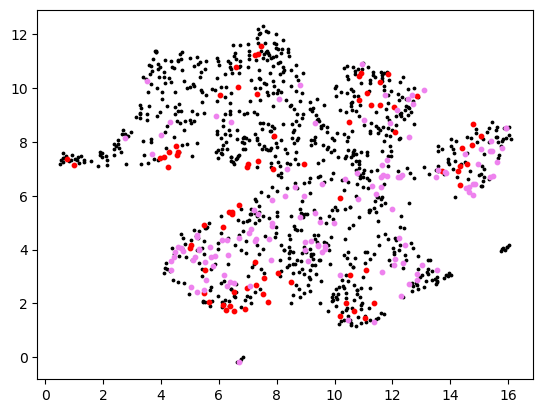

In [21]:
import matplotlib.pyplot as plt

figure, axes = plt.subplots()

#color =  x[:,index_array[0]]

ax = axes.scatter(adata.obsm['X_umap'][:,0],adata.obsm['X_umap'][:,1], s = 3, color = 'k')
index = np.where(stim == 1)[0]
ax = axes.scatter(adata.obsm['X_umap'][index,0],adata.obsm['X_umap'][index,1], s = 10, color = 'r')
index = np.where(stim == 2)[0]
ax = axes.scatter(adata.obsm['X_umap'][index,0],adata.obsm['X_umap'][index,1], s = 10, color = 'violet')

#figure.colorbar(ax=ax)

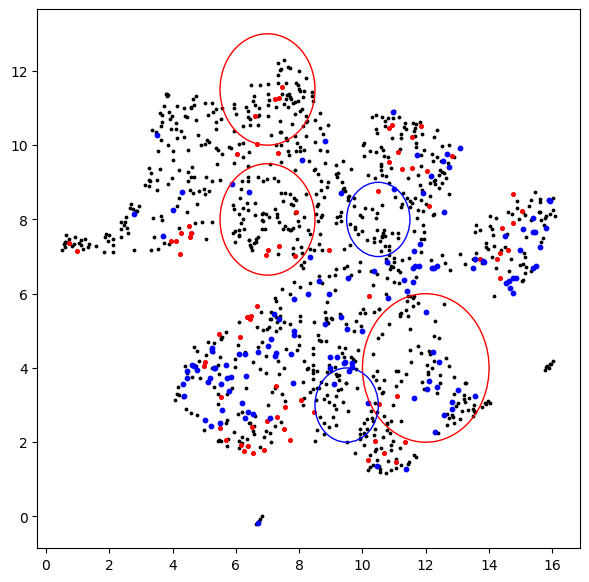

In [23]:
### Create fake stimuli cell pattens that correspond to some cells
# WE HAVE TO CHANGE THIS BECAUSE IT WAS ORIGINALY BASED ON UMAP WITH PLATE 1 AND 2 ONLY
# from pinch
center = np.zeros((5,2))
radius = np.zeros((5,))
center[0,0] = 7
center[0,1] = 11.5
radius[0] = 1.5
center[1,0] = 7
center[1,1] = 8
radius[1] = 1.5
center[2,0] = 12
center[2,1] = 4
radius[2] = 2
center[3,0] = 10.5
center[3,1] = 8
radius[3] = 1
center[4,0] = 9.5
center[4,1] = 3
radius[4] = 1.

figure, axes = plt.subplots()

#color =  x[:,index_array[0]]
circle1 = plt.Circle(center[0,:], radius[0], color='r', fill = False)
circle2 = plt.Circle(center[1,:], radius[1], color='r', fill = False)
circle3 = plt.Circle(center[2,:], radius[2], color='r', fill = False)
circle4 = plt.Circle(center[3,:], radius[3], color='b', fill = False)
circle5 = plt.Circle(center[4,:], radius[4], color='b', fill = False)

axes.scatter(adata.obsm['X_umap'][:,0],adata.obsm['X_umap'][:,1], s = 3, color = 'k')
index = np.where(stim == 1)[0]
axes.scatter(adata.obsm['X_umap'][index,0],adata.obsm['X_umap'][index,1], s = 7, color = 'r')
index = np.where(stim == 2)[0]
ax = axes.scatter(adata.obsm['X_umap'][index,0],adata.obsm['X_umap'][index,1], s = 10, color = 'b')

axes.add_patch(circle1)
axes.add_patch(circle2)
axes.add_patch(circle3)
axes.add_patch(circle4)
axes.add_patch(circle5)

figure.set_size_inches([7,7])
figure.savefig(figure_path + 'pinch_selection.png')

In [24]:
pinch_subsets = np.zeros((5,len(stim)))
for i in range(len(stim)):
    coordinate = adata.obsm['X_umap'][i,:]
    dist1 = np.linalg.norm(coordinate - center[0,:])
    dist2 = np.linalg.norm(coordinate - center[1,:])
    dist3 = np.linalg.norm(coordinate - center[2,:])
    dist4 = np.linalg.norm(coordinate - center[3,:])
    dist5 = np.linalg.norm(coordinate - center[4,:])
    if stim[i] == 1 and dist1 < radius[0]:
        pinch_subsets[0,i] = 1    
    if stim[i] == 1 and dist2 < radius[1]:
        pinch_subsets[1,i] = 1
    if stim[i] == 1 and dist3 < radius[2]:
        pinch_subsets[2,i] = 1
    if stim[i] == 2 and dist4 < radius[3]:
        pinch_subsets[3,i] = 1    
    if stim[i] == 2 and dist5 < radius[4]:
        pinch_subsets[4,i] = 1